# Test Client Image

In [1]:
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt

### Extract Client Image from saved file

In [2]:
with open('client_data', 'rb') as file:
    img = pickle.load(file)
np_img = np.array(img)
print('Initial Shape:', np_img.shape)

Initial Shape: (363, 375)


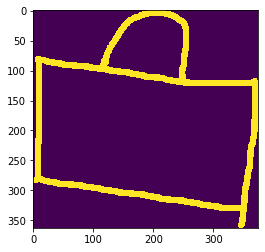

In [3]:
plt.imshow(np_img)

### Attempt to down-scale to 25 x 25
The reason why 25 instead of 28 is because we need to have some spacing away from the border

In [4]:
np_img = np.where(np_img == 0, 0, 255)
pil_img = Image.fromarray(np_img)
pil_img.thumbnail((25, 25))
print('Thumbnail Size:', pil_img.size)

Thumbnail Size: (25, 24)


> We can see that it is not exactly 25 x 25 (but it doesn't matter)

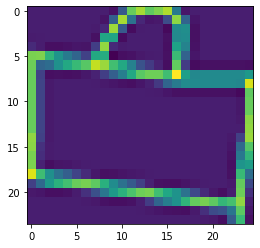

In [5]:
np_img2 = np.array(pil_img)
plt.imshow(np_img2)

### Scale up to 28 x 28

In [6]:
white_back = Image.fromarray(np.full((28,28),0))
width_offset = round((white_back.width - pil_img.width) / 2)
height_offset = round((white_back.height - pil_img.height) / 2)
white_back.paste(pil_img, (width_offset, height_offset))

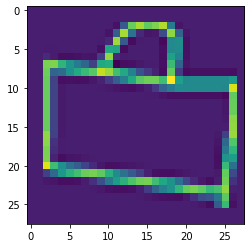

In [7]:
np_img3 = np.array(white_back)
plt.imshow(np_img3)

#### Add Binarisation

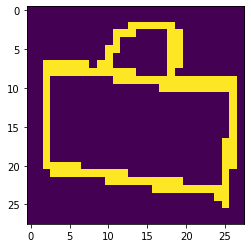

In [8]:
np_img4 = np.where(np_img3 < 50, 0, 1)
plt.imshow(np_img4)